# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210

# LSTM *Classifier for MDGender Dataset*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Packages

In [2]:
!pip install scikit-multilearn
!pip install tensorflow-addons
!pip install transformers
!pip install keras-tqdm

     |████████████████████████████████| 89 kB 3.8 MB/s 
     |████████████████████████████████| 679 kB 5.3 MB/s 
     |████████████████████████████████| 2.6 MB 5.3 MB/s 
     |████████████████████████████████| 636 kB 50.4 MB/s 
     |████████████████████████████████| 3.3 MB 46.8 MB/s 
     |████████████████████████████████| 895 kB 74.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Imports

In [3]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import F1Score

from sklearn.metrics import classification_report

BASE_PATH = '/content/drive/MyDrive/Ciência de Dados/Projeto Final'
DATASETS_PATH = BASE_PATH + "/Resources/Datasets"

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [4]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/Modules')

import utils, text, model
from importlib import reload

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.103.230.82:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.103.230.82:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Leitura dos Dados

In [5]:
df = pd.read_csv(DATASETS_PATH + '/MDGender/md_gender_bias/new_data/new_data.csv')

df.head()

,text,original,labels,class_type,turker_gender,episode_done,confidence,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore,labels_enc,label_pos_0,label_pos_1
0,He designed monumental Lovissa War Cemetery in...,She designed monumental Loviisa war cemetery ...,male,0,4,True,certain,"['designed', 'monumental', 'lovissa', 'war', '...",he designed monumental lovissa war cemetery in...,8,designed monumental lovissa war cemetery 1920,1,0.0,1.0
1,She works as a volunteer firefighter.,I work as a volunteer firefighter.,female,2,4,True,certain,"['works', 'volunteer', 'firefighter']",she works as a volunteer firefighter,6,works volunteer firefighter,0,1.0,0.0
2,She participated in the FIVB volleyball grand ...,She participated in the FIVB volleyball grand ...,female,0,4,True,certain,"['participated', 'fivb', 'volleyball', 'grand'...",she participated in the fivb volleyball grand ...,11,participated fivb volleyball grand champions c...,0,1.0,0.0
3,Correct ! Walter Havighurst was an author of m...,Correct! Walter Havighurst was an author of ma...,male,0,4,True,certain,"['correct', 'walter', 'havighurst', 'author', ...",correct walter havighurst was an author of man...,19,correct walter havighurst author books loved b...,1,0.0,1.0
4,"Yes, she released only one album with them, ""w...","yes, He released only one album with them, ""Wo...",female,0,4,True,certain,"['yes', 'released', 'album', 'wołanie', 'o', '...",yes she released only one album with them woła...,13,yes released album wołanie o słońce nad światem,0,1.0,0.0


In [6]:
labels = ['female', 'male']

# Leitura das *Word Embeddings* Pré-Treinadas

In [7]:
FASTTEXT = {}
f = open(BASE_PATH + '/Resources/FastText Word Embeddings/wiki-news-300d-1M.vec', encoding='utf8')
index = 1

for line in f:
  values = line.split()
  word = values[0]
  FASTTEXT[word] = (index, np.asarray(values[1:], dtype='float32'))
  index += 1
f.close()

print('Quantidade de word embeddings = {}'.format(len(FASTTEXT.keys())))

Quantidade de word embeddings = 999995


# Treinamento do LSTM *Classifier*

## Representação Textual

In [8]:
df['text_tokens'] = df['text_tokens'].apply(lambda x: list(ast.literal_eval(x)))

padded_tokens = text.padding_sequences_ftext(df['text_tokens'].to_numpy(), FASTTEXT, text.MAX_LENGTH)


Text to sequences for LSTM Classifier with FastText embeddings:   0%|          | 0/2292 [00:00<?, ?it/s]

Padding the sequences...


## Divisão Estratificada

In [9]:
y = df[['label_pos_0', 'label_pos_1']].to_numpy()

X_train, y_train, X_test, y_test, X_dev, y_dev = text.data_split(padded_tokens, y, test_size=0.2, dev_size=0.1, random_seed=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_dev.shape, y_dev.shape), y.shape

(((1650, 60), (1650, 2)),
 ((459, 60), (459, 2)),
 ((183, 60), (183, 2)),
 (2292, 2))

In [10]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

result_comb_matrix = pd.DataFrame({
    'data':  Counter(str(combination) for row in get_combination_wise_output_matrix(y, order=1) for combination in row),
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test':  Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row),
    'dev':   Counter(str(combination) for row in get_combination_wise_output_matrix(y_dev, order=1) for combination in row)
}).T.fillna(0.0)

result_comb_matrix.style.background_gradient(cmap=plt.get_cmap('Pastel2'))

,"(1,)","(0,)"
data,1163,1129
train,837,813
test,233,226
dev,93,90


In [11]:
test_data = pd.DataFrame(columns=['tokens_ids', 'y'])

for ids, y in zip(X_test, y_test):
  test_data = test_data.append({
      'tokens_ids': ids,
      'y': y
  }, ignore_index=True)

test_data.to_json(DATASETS_PATH + '/MDGender/md_gender_bias/new_data/lstm_padded_test_data.json', orient='records')

## Treino do Modelo

In [12]:
embedding_dim = 300
embedding_matrix = np.random.random((len(FASTTEXT.keys()) + 1, embedding_dim))

with tqdm_notebook(total=len(FASTTEXT.items())) as pbar:
  for word in FASTTEXT.keys():
      embedding_tuple = FASTTEXT.get(word)
      if embedding_tuple is not None:
          embedding_matrix[embedding_tuple[0]] = embedding_tuple[1]
      pbar.update(1)
  pbar.close()

  0%|          | 0/999995 [00:00<?, ?it/s]

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

auc_score = AUC(multi_label=True)
# f1_score = F1Score(num_classes=y.shape[1], threshold=0.5, average='weighted')

model_path = BASE_PATH + '/Resources/Models/best_lstm_classifier_md_gender.h5'

model_meta = model.run_text_classifier(model.lstm_classifier,
                                       X_train, y_train,
                                       X_dev, y_dev,
                                       batch_size=32,
                                       max_epochs=100,
                                       patience=10,
                                       eval_metric=auc_score,
                                       monitor='val_auc',
                                       source_length=text.MAX_LENGTH,
                                       hidden_units=128,
                                       labels_size=len(labels), 
                                       model_path=model_path,
                                       vocab_size=len(FASTTEXT.keys()) + 1,
                                       embedding_dim=embedding_dim,
                                       embedding_matrix=embedding_matrix)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 60, 300)           299998800 
_________________________________________________________________
lstm (LSTM)                  (None, 60, 128)           219648    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

52/52 [==============================] - 6s 68ms/step - loss: 0.6956 - auc: 0.4870 - val_loss: 0.6927 - val_auc: 0.5373

Epoch 00001: val_auc improved from -inf to 0.53734, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_md_gender.h5
Epoch 2/100
52/52 [==============================] - 3s 54ms/step - loss: 0.6929 - auc: 0.5107 - val_loss: 0.6924 - val_auc: 0.5510

Epoch 00002: val_auc improved from 0.53734 to 0.55099, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_md_gender.h5
Epoch 3/100
52/52 [==============================] - 3s 54ms/step - loss: 0.6925 - auc: 0.5246 - val_loss: 0.6916 - val_auc: 0.5629

Epoch 00003: val_auc improved from 0.55099 to 0.56287, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_md_gender.h5
Epoch 4/100
52/52 [==============================] - 3s 52ms/step - loss: 0.6913 - au

In [14]:
model_meta['run_time'], model_meta['start'], model_meta['final']

('00:02:58', '18/08/2021 09:19', '18/08/2021 09:33')

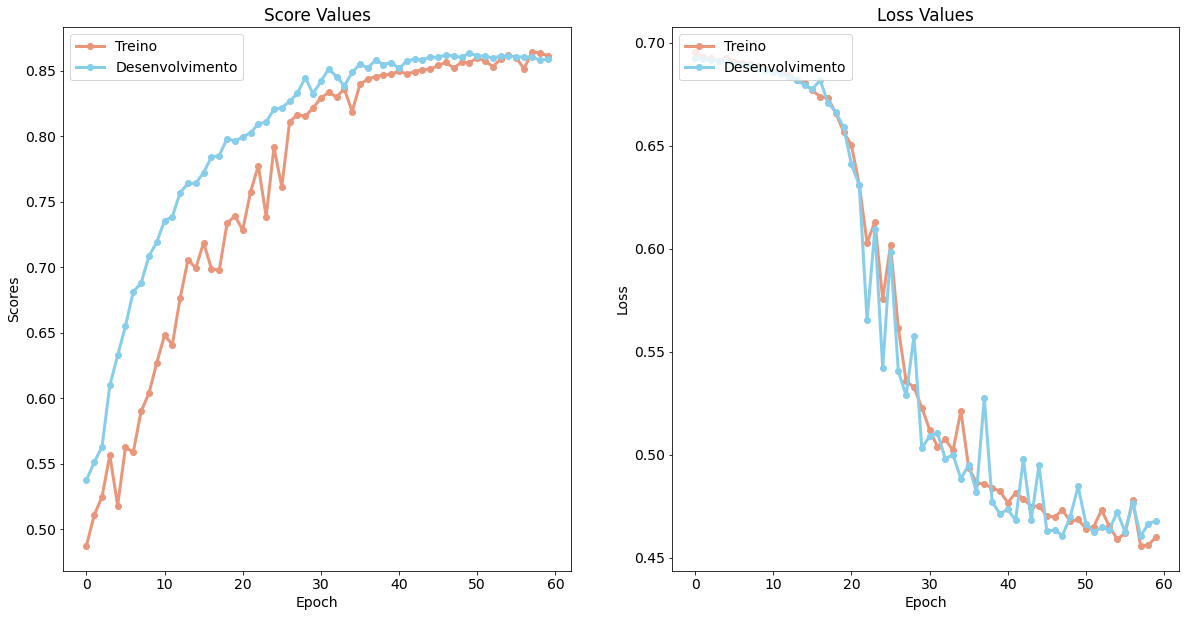

In [15]:
model.plot_model_loss_score(model_meta['history'], score_name='auc')

In [16]:
model_meta['model'].load_weights(model_path)
y_pred = np.rint(model_meta['model'].predict(X_test))

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      female       0.75      0.73      0.74       226
        male       0.75      0.77      0.76       233

   micro avg       0.75      0.75      0.75       459
   macro avg       0.75      0.75      0.75       459
weighted avg       0.75      0.75      0.75       459
 samples avg       0.75      0.75      0.75       459

